ÿπÿØÿØ ÿßŸÑÿπŸÇÿØ: 34
ÿπÿØÿØ ÿßŸÑÿ≠ŸàÿßŸÅ: 78
ŸÖÿ™Ÿàÿ≥ÿ∑ ÿØÿ±ÿ¨ÿ© ÿßŸÑÿπŸÇÿØÿ©: 4.59


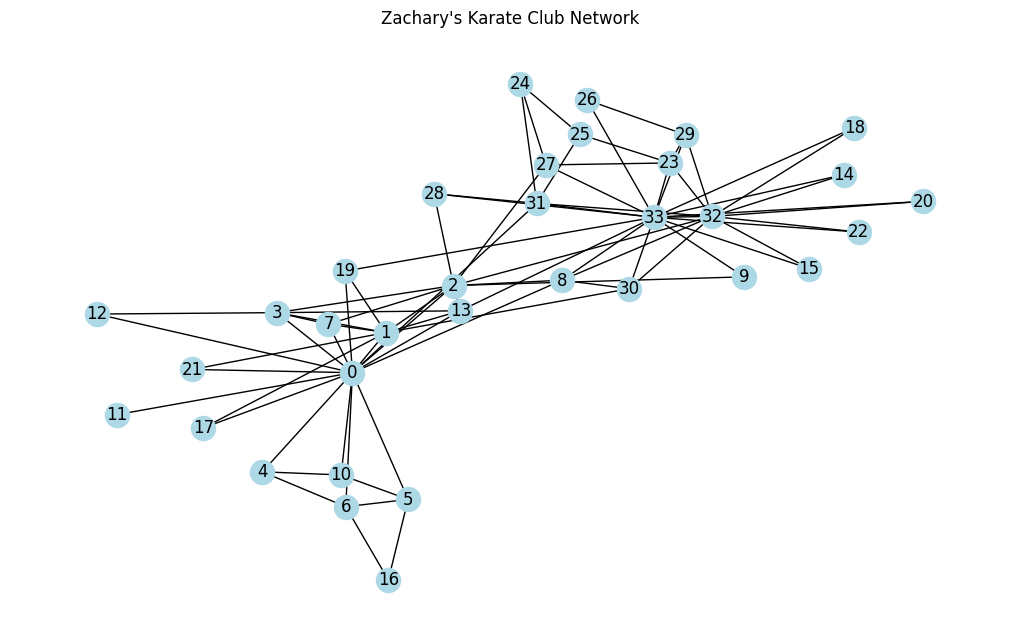

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import girvan_newman
from networkx.algorithms.community import greedy_modularity_communities
from itertools import chain, combinations
import numpy as np

# ÿ™ÿ≠ŸÖŸäŸÑ ŸÖÿ¨ŸÖŸàÿπÿ© ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
G = nx.karate_club_graph()

# ŸÖÿπŸÑŸàŸÖÿßÿ™ ÿßŸÑÿ¥ÿ®ŸÉÿ©
print(f"ÿπÿØÿØ ÿßŸÑÿπŸÇÿØ: {G.number_of_nodes()}")
print(f"ÿπÿØÿØ ÿßŸÑÿ≠ŸàÿßŸÅ: {G.number_of_edges()}")
print(f"ŸÖÿ™Ÿàÿ≥ÿ∑ ÿØÿ±ÿ¨ÿ© ÿßŸÑÿπŸÇÿØÿ©: {sum(dict(G.degree()).values())/G.number_of_nodes():.2f}")

# ÿ±ÿ≥ŸÖ ÿßŸÑÿ¥ÿ®ŸÉÿ© ÿßŸÑÿ£ÿ≥ÿßÿ≥Ÿäÿ©
plt.figure(figsize=(10, 6))
nx.draw_spring(G, with_labels=True, node_color='lightblue')
plt.title("Zachary's Karate Club Network")
plt.show()

ÿÆŸàÿßÿ±ÿ≤ŸÖŸäÿ© Girvan-Newman ÿ™Ÿèÿ≥ÿ™ÿÆÿØŸÖ ŸÑÿ™ŸÇÿ≥ŸäŸÖ ÿ¥ÿ®ŸÉÿ© Zachary's Karate Club ÿ•ŸÑŸâ ŸÖÿ¨ÿ™ŸÖÿπÿßÿ™


ÿ™ŸÉÿ™ÿ¥ŸÅ ÿßŸÑŸÖÿ¨ÿ™ŸÖÿπÿßÿ™ ÿßŸÑÿßÿ¨ÿ™ŸÖÿßÿπŸäÿ© ŸÅŸä ÿßŸÑÿ¥ÿ®ŸÉÿ© (ŸÖÿ´ŸÑ ŸÖÿ¨ŸÖŸàÿπÿ© ÿßŸÑÿ£ÿπÿ∂ÿßÿ° ÿßŸÑŸÖŸàÿßŸÑŸäŸÜ ŸÑŸÑŸÖÿØÿ±ÿ® ŸàŸÖÿ¨ŸÖŸàÿπÿ© ÿßŸÑÿ£ÿπÿ∂ÿßÿ° ÿßŸÑŸÖŸàÿßŸÑŸäŸÜ ŸÑŸÑŸÖÿØŸäÿ±).

ÿ™Ÿèÿ∏Ÿáÿ± ŸÉŸäŸÅ ÿ™ŸÜŸÇÿ≥ŸÖ ÿßŸÑÿ¥ÿ®ŸÉÿ© ÿ®ŸÜÿßÿ°Ÿã ÿπŸÑŸâ ŸÇŸàÿ© ÿßŸÑÿπŸÑÿßŸÇÿßÿ™ ÿ®ŸäŸÜ ÿßŸÑÿ£ÿπÿ∂ÿßÿ°.


Girvan-Newman

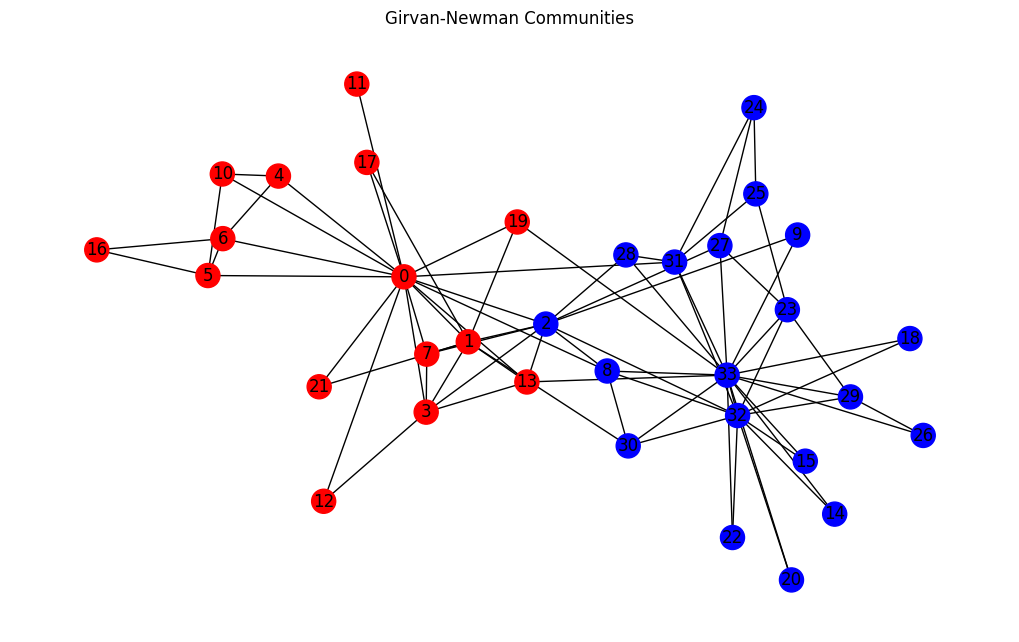

In [ ]:
# ÿ™ÿ∑ÿ®ŸäŸÇ ÿÆŸàÿßÿ±ÿ≤ŸÖŸäÿ© Girvan-Newman
def apply_girvan_newman(graph, k=2):
    comp = girvan_newman(graph)
    communities = []
    for c in next(comp):
        communities.append(list(c))
    return communities

gn_communities = apply_girvan_newman(G)

# ÿ±ÿ≥ŸÖ ÿßŸÑŸÜÿ™ÿßÿ¶ÿ¨
def draw_communities(graph, communities, title):
    colors = ['red', 'blue', 'green', 'yellow', 'purple']
    node_colors = []
    for node in graph.nodes():
        for i, community in enumerate(communities):
            if node in community:
                node_colors.append(colors[i % len(colors)])
                break
    plt.figure(figsize=(10, 6))
    nx.draw_spring(graph, node_color=node_colors, with_labels=True)
    plt.title(title)
    plt.show()
draw_communities(G, gn_communities, "Girvan-Newman Communities")

ÿÆŸàÿßÿ±ÿ≤ŸÖŸäÿ© Ravasz ÿßŸÑŸáÿ±ŸÖŸäÿ© ÿ™Ÿèÿ≥ÿ™ÿÆÿØŸÖ ŸÑÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑÿ¥ÿ®ŸÉÿ© (ŸÖÿ´ŸÑ Zachary's Karate Club) ÿ•ŸÑŸâ ŸÖÿ¨ÿ™ŸÖÿπÿßÿ™ ÿ®ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ ÿßŸÑÿ™ÿ¨ŸÖŸäÿπ ÿßŸÑŸáÿ±ŸÖŸä (Hierarchical Clustering) ÿ®ŸÜÿßÿ°Ÿã ÿπŸÑŸâ ÿßŸÑŸÖÿ≥ÿßŸÅÿßÿ™ ÿ®ŸäŸÜ ÿßŸÑÿπŸÇÿØ

ÿ™ŸèŸÇÿ≥ŸÖ ÿßŸÑÿ¥ÿ®ŸÉÿ© (ŸÖÿ´ŸÑ Karate Club) ÿ•ŸÑŸâ ŸÖÿ¨ÿ™ŸÖÿπÿßÿ™ ÿ®ŸÜÿßÿ°Ÿã ÿπŸÑŸâ ŸÇÿ±ÿ® ÿßŸÑÿπŸÇÿØ (ÿßŸÑŸÖÿ≥ÿßŸÅÿßÿ™ ÿßŸÑŸÇÿµŸäÿ±ÿ© ÿ®ŸäŸÜ ÿßŸÑÿ£ÿ¥ÿÆÿßÿµ ŸÅŸä ÿßŸÑŸÜÿßÿØŸä).

ÿ™Ÿèÿ≠ÿØÿØ ŸÖÿ¨ŸÖŸàÿπÿßÿ™ ŸÖÿ™ÿ±ÿßÿ®ÿ∑ÿ© (ŸÖÿ´ŸÑ ŸÖÿ¨ŸÖŸàÿπÿ© ÿßŸÑÿ£ÿπÿ∂ÿßÿ° ÿßŸÑŸÖŸàÿßŸÑŸäŸÜ ŸÑŸÑŸÖÿØÿ±ÿ® ÿ£Ÿà ÿßŸÑŸÖÿØŸäÿ±) ÿ®ŸÜÿßÿ°Ÿã ÿπŸÑŸâ ŸÉÿ´ÿßŸÅÿ© ÿßŸÑÿßÿ™ÿµÿßŸÑÿßÿ™.

Ravasz Hierarchical 

C:\Users\original\AppData\Local\Temp\ipykernel_6848\3388928527.py:13: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distances, method='average')


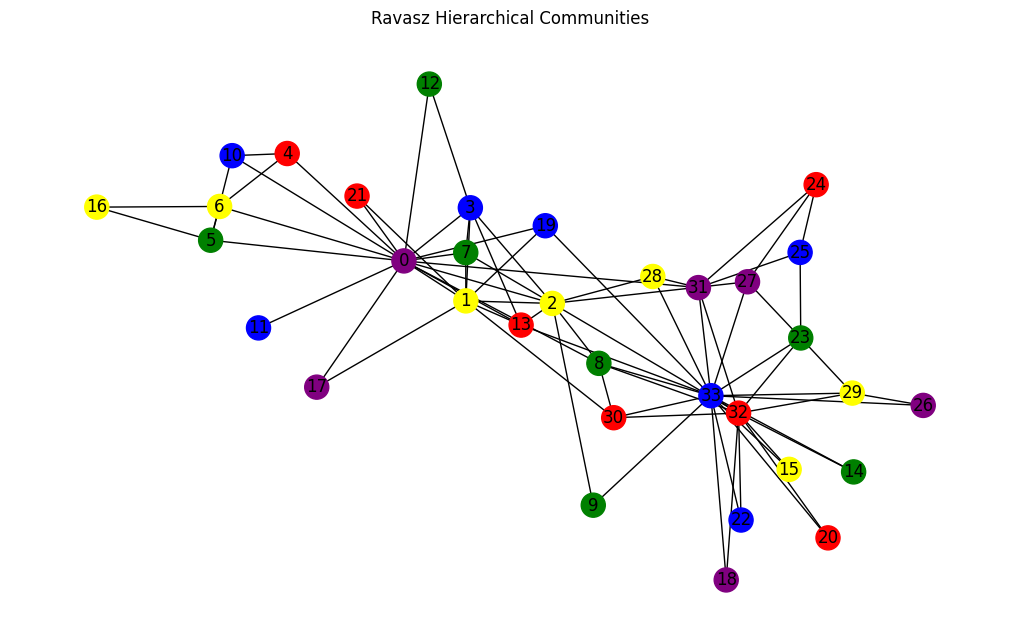

In [3]:
# ÿ™ÿ∑ÿ®ŸäŸÇ ÿÆŸàÿßÿ±ÿ≤ŸÖŸäÿ© Ravasz ÿßŸÑŸáÿ±ŸÖŸäÿ©
def apply_ravasz(graph, threshold=0.7):
    # ÿ≠ÿ≥ÿßÿ® ŸÖÿµŸÅŸàŸÅÿ© ÿßŸÑŸÖÿ≥ÿßŸÅÿßÿ™
    path_length = dict(nx.all_pairs_shortest_path_length(G))
    distances = np.zeros((G.number_of_nodes(), G.number_of_nodes()))
    
    for i, node1 in enumerate(G.nodes()):
        for j, node2 in enumerate(G.nodes()):
            distances[i,j] = path_length[node1][node2]
    
    # ÿ™ÿ∑ÿ®ŸäŸÇ clustering Ÿáÿ±ŸÖŸä
    from scipy.cluster.hierarchy import linkage, fcluster
    Z = linkage(distances, method='average')
    communities = fcluster(Z, t=threshold, criterion='distance')
    
    # ÿ™ÿ≠ŸàŸäŸÑ ÿ•ŸÑŸâ ÿ™ŸÜÿ≥ŸäŸÇ communities
    unique_clusters = set(communities)
    ravasz_communities = []
    for cluster in unique_clusters:
        community = [i for i, x in enumerate(communities) if x == cluster]
        ravasz_communities.append(community)
    
    return ravasz_communities

ravasz_communities = apply_ravasz(G)

draw_communities(G, ravasz_communities, "Ravasz Hierarchical Communities")

ÿÆŸàÿßÿ±ÿ≤ŸÖŸäÿ© Clique Percolation Method (CPM) ÿ™Ÿèÿ≥ÿ™ÿÆÿØŸÖ ŸÑŸÑŸÉÿ¥ŸÅ ÿπŸÜ ÿßŸÑŸÖÿ¨ÿ™ŸÖÿπÿßÿ™ ŸÅŸä ÿßŸÑÿ¥ÿ®ŸÉÿ© (ŸÖÿ´ŸÑ Zachary's Karate Club) ÿ®ŸÜÿßÿ°Ÿã ÿπŸÑŸâ ŸÖŸÅŸáŸàŸÖ k-cliques (ŸÖÿ¨ŸÖŸàÿπÿßÿ™ ŸÖŸÜ ÿßŸÑÿπŸÇÿØ ŸÖÿ™ÿ±ÿßÿ®ÿ∑ÿ© ÿ®ÿßŸÑŸÉÿßŸÖŸÑ ÿ®ÿ≠ÿ¨ŸÖ 
ùëò
k ÿ£Ÿà ÿ£ŸÉÿ´ÿ±).

  Clique Percolation

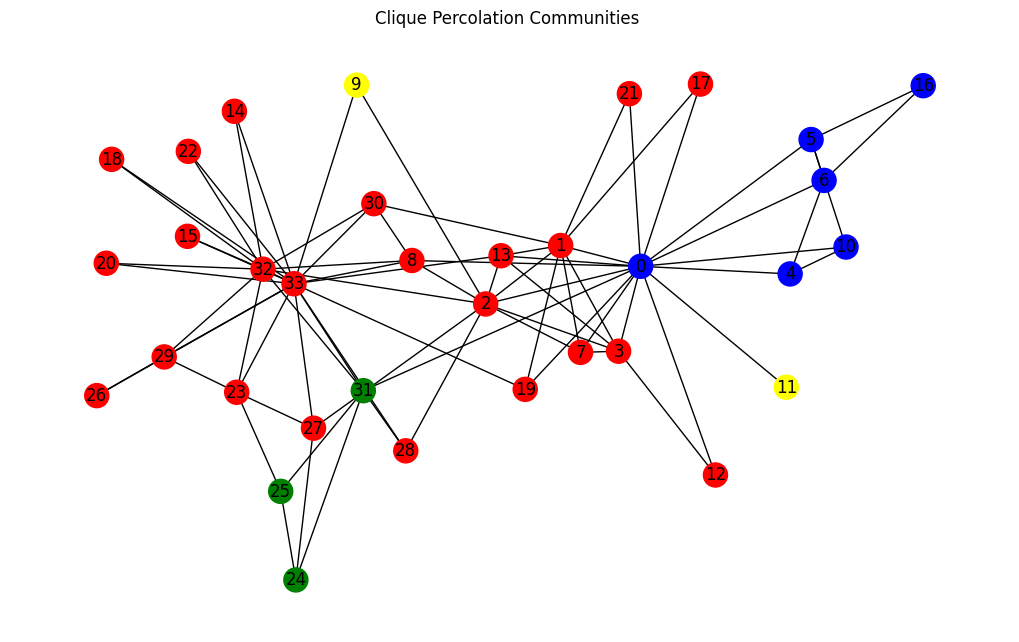

In [4]:
def apply_clique_percolation(graph, k=3):
    # ÿ•Ÿäÿ¨ÿßÿØ ÿ¨ŸÖŸäÿπ cliques ÿ®ÿ≠ÿ¨ŸÖ k
    cliques = list(nx.find_cliques(graph))
    k_cliques = [clique for clique in cliques if len(clique) >= k]
    
    if not k_cliques:
        return [list(graph.nodes())]  # ÿ•ÿ∞ÿß ŸÑŸÖ ŸÜÿ¨ÿØ ÿ£Ÿä cliquesÿå ŸÜÿπÿ™ÿ®ÿ± ŸÉŸÑ ÿßŸÑÿπŸÇÿØ ŸÖÿ¨ÿ™ŸÖÿπ Ÿàÿßÿ≠ÿØ
    
    # ÿ®ŸÜÿßÿ° clique graph
    clique_graph = nx.Graph()
    for i, clique in enumerate(k_cliques):
        clique_graph.add_node(i)
    
    for i in range(len(k_cliques)):
        for j in range(i+1, len(k_cliques)):
            if len(set(k_cliques[i]) & set(k_cliques[j])) >= k-1:
                clique_graph.add_edge(i, j)
    
    # ÿ•Ÿäÿ¨ÿßÿØ ÿßŸÑŸÖŸÉŸàŸÜÿßÿ™ ÿßŸÑŸÖÿ™ÿµŸÑÿ©
    communities = list(nx.connected_components(clique_graph))
    
    # ÿ™ÿ≠ŸàŸäŸÑ ÿ•ŸÑŸâ ÿ™ŸÜÿ≥ŸäŸÇ ÿßŸÑÿπŸÇÿØ
    node_communities = []
    for com in communities:
        community = set()
        for clique_idx in com:
            community.update(k_cliques[clique_idx])
        node_communities.append(list(community))
    
    # ÿ•ÿ∂ÿßŸÅÿ© ÿßŸÑÿπŸÇÿØ ÿ∫Ÿäÿ± ÿßŸÑŸÖÿ∂ŸÖŸÜÿ© ŸÅŸä ÿ£Ÿä ŸÖÿ¨ÿ™ŸÖÿπ ŸÉŸÖÿ¨ÿ™ŸÖÿπ ŸÖŸÜŸÅÿµŸÑ
    all_covered_nodes = set().union(*[set(c) for c in node_communities])
    uncovered_nodes = set(graph.nodes()) - all_covered_nodes
    if uncovered_nodes:
        node_communities.append(list(uncovered_nodes))
    
    return node_communities

def draw_communities(graph, communities, title):
    # ÿ•ŸÜÿ¥ÿßÿ° ŸÇÿßŸÖŸàÿ≥ ŸÑÿ™ÿπŸäŸäŸÜ ÿßŸÑÿπŸÇÿØÿ© ÿ•ŸÑŸâ ŸÑŸàŸÜŸáÿß
    node_to_color = {}
    colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'pink', 'brown']
    
    for i, community in enumerate(communities):
        for node in community:
            node_to_color[node] = colors[i % len(colors)]
    
    # ÿ•ŸÜÿ¥ÿßÿ° ŸÇÿßÿ¶ŸÖÿ© ÿßŸÑÿ£ŸÑŸàÿßŸÜ ŸÖÿ±ÿ™ÿ®ÿ© ÿ≠ÿ≥ÿ® ÿßŸÑÿπŸÇÿØ ŸÅŸä ÿßŸÑÿ±ÿ≥ŸÖ ÿßŸÑÿ®ŸäÿßŸÜŸä
    node_colors = [node_to_color.get(node, 'gray') for node in graph.nodes()]
    
    plt.figure(figsize=(10, 6))
    nx.draw_spring(graph, node_color=node_colors, with_labels=True)
    plt.title(title)
    plt.show()

# ÿ™ÿ∑ÿ®ŸäŸÇ ÿßŸÑÿÆŸàÿßÿ±ÿ≤ŸÖŸäÿ© ÿßŸÑŸÖÿπÿØŸÑÿ©
clique_communities = apply_clique_percolation(G, k=3)
draw_communities(G, clique_communities, "Clique Percolation Communities ")

Comparsion between Girvan-Newman, Ravasz Hierarchical and Clique Percolation

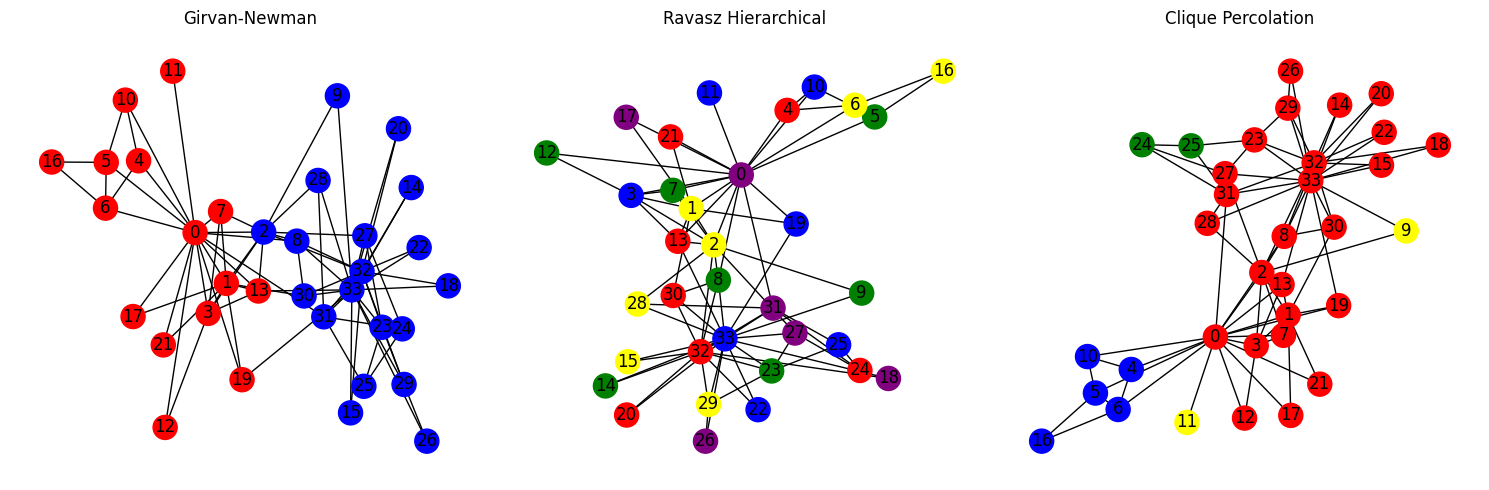

In [7]:
# ŸÖŸÇÿßÿ±ŸÜÿ© ŸÜÿ™ÿßÿ¶ÿ¨ ÿßŸÑÿÆŸàÿßÿ±ÿ≤ŸÖŸäÿßÿ™
def compare_communities(communities_list, names):
    plt.figure(figsize=(15, 5))
    for i, (communities, name) in enumerate(zip(communities_list, names)):
        plt.subplot(1, 3, i+1)
        colors = ['red', 'blue', 'green', 'yellow', 'purple']
        node_colors = []
        for node in G.nodes():
            for j, community in enumerate(communities):
                if node in community:
                    node_colors.append(colors[j % len(colors)])
                    break
        nx.draw_spring(G, node_color=node_colors, with_labels=True)
        plt.title(name)
    plt.tight_layout()
    plt.show()

# ÿ™ŸÜŸÅŸäÿ∞ ÿßŸÑŸÖŸÇÿßÿ±ŸÜÿ©
algorithms = [gn_communities, ravasz_communities, clique_communities]
names = ["Girvan-Newman", "Ravasz Hierarchical", "Clique Percolation"]
compare_communities(algorithms, names)

Analytic between Girvan-Newman, Ravasz Hierarchical and Clique Percolation

In [ ]:
!pip install sklearn

^C


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  √ó Getting requirements to build wheel did not run successfully.
  ‚îÇ exit code: 1
  ‚ï∞‚îÄ> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/s

In [8]:
# ÿ≠ÿ≥ÿßÿ® ŸÖŸÇÿßŸäŸäÿ≥ ÿßŸÑÿ¨ŸàÿØÿ© ŸÑŸÑÿ™ÿ¨ŸÖŸäÿπ
from sklearn import metrics

# ÿ•ŸÜÿ¥ÿßÿ° ÿ™ÿ≥ŸÖŸäÿßÿ™ ÿ≠ŸÇŸäŸÇŸäÿ© (ÿßŸÑŸÖÿ¨ŸÖŸàÿπÿßÿ™ ÿßŸÑÿ£ÿµŸÑŸäÿ© ŸÅŸä ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™)
true_labels = [0 if G.nodes[n]['club'] == 'Mr. Hi' else 1 for n in G.nodes()]

def evaluate_communities(communities, true_labels, name):
    # ÿ™ÿ≠ŸàŸäŸÑ ÿßŸÑÿ™ÿ¨ŸÖŸäÿπ ÿ•ŸÑŸâ ÿ™ÿ≥ŸÖŸäÿßÿ™
    pred_labels = np.zeros(len(true_labels))
    for i, com in enumerate(communities):
        for node in com:
            pred_labels[node] = i
    
    # ÿ≠ÿ≥ÿßÿ® ÿßŸÑŸÖŸÇÿßŸäŸäÿ≥
    ari = metrics.adjusted_rand_score(true_labels, pred_labels)
    nmi = metrics.normalized_mutual_info_score(true_labels, pred_labels)
    
    print(f"{name} Algorithm Evaluation:")
    print(f"Adjusted Rand Index: {ari:.3f}")
    print(f"Normalized Mutual Info: {nmi:.3f}\n")

# ÿ™ŸÇŸäŸäŸÖ ŸÉŸÑ ÿÆŸàÿßÿ±ÿ≤ŸÖŸäÿ©
evaluate_communities(gn_communities, true_labels, "Girvan-Newman")
evaluate_communities(ravasz_communities, true_labels, "Ravasz")
evaluate_communities(clique_communities, true_labels, "Clique Percolation")

ModuleNotFoundError: No module named 'sklearn'

Girvan-Newman:

ÿ™ÿπÿ™ŸÖÿØ ÿπŸÑŸâ ÿ•ÿ≤ÿßŸÑÿ© ÿßŸÑÿ≠ŸàÿßŸÅ ÿ∞ÿßÿ™ ÿ£ÿπŸÑŸâ betweenness

ÿ™ŸÖŸäŸÑ ÿ•ŸÑŸâ ÿ•ŸÜÿ™ÿßÿ¨ ŸÖÿ¨ÿ™ŸÖÿπÿßÿ™ ŸÖÿ™Ÿàÿßÿ≤ŸÜÿ© ÿßŸÑÿ≠ÿ¨ŸÖ

ÿ≠ÿ≥ÿßÿ≥ÿ© ŸÑÿ®ŸÜŸäÿ© ÿßŸÑÿ¥ÿ®ŸÉÿ© ÿßŸÑŸáÿ±ŸÖŸäÿ©

Ravasz:

ÿÆŸàÿßÿ±ÿ≤ŸÖŸäÿ© ÿ™ÿ≥ŸÑÿ≥ŸÑ Ÿáÿ±ŸÖŸä

ÿ™ÿπŸÖŸÑ ÿ¨ŸäÿØÿßŸã ŸÖÿπ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑÿ™Ÿä ŸÑŸáÿß ÿ®ŸÜŸäÿ© Ÿáÿ±ŸÖŸäÿ© Ÿàÿßÿ∂ÿ≠ÿ©

ÿ™ÿ≠ÿ™ÿßÿ¨ ŸÑÿ∂ÿ®ÿ∑ ŸÖÿπÿßŸÖŸÑ ÿßŸÑÿπÿ™ÿ®ÿ© (threshold)

Clique Percolation:

ÿ™ÿπÿ™ŸÖÿØ ÿπŸÑŸâ ÿßŸÉÿ™ÿ¥ÿßŸÅ ÿßŸÑŸÖÿ¨ÿ™ŸÖÿπÿßÿ™ ÿßŸÑŸÉÿ´ŸäŸÅÿ© (cliques)

ŸÖŸÜÿßÿ≥ÿ®ÿ© ŸÑŸÑÿ¥ÿ®ŸÉÿßÿ™ ÿ∞ÿßÿ™ ÿßŸÑŸÉÿ´ÿßŸÅÿ© ÿßŸÑÿπÿßŸÑŸäÿ©

ÿ≠ÿ≥ÿßÿ≥ÿ© ŸÑÿßÿÆÿ™Ÿäÿßÿ± ÿ≠ÿ¨ŸÖ ÿßŸÑŸÄ clique (k)